In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Puskchan\AppData\Local\Programs\Python\Python38\Lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("D:\Calorie_prediction\calorie.csv")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [3]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df = df.drop(['User_ID'], axis=1)

In [6]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


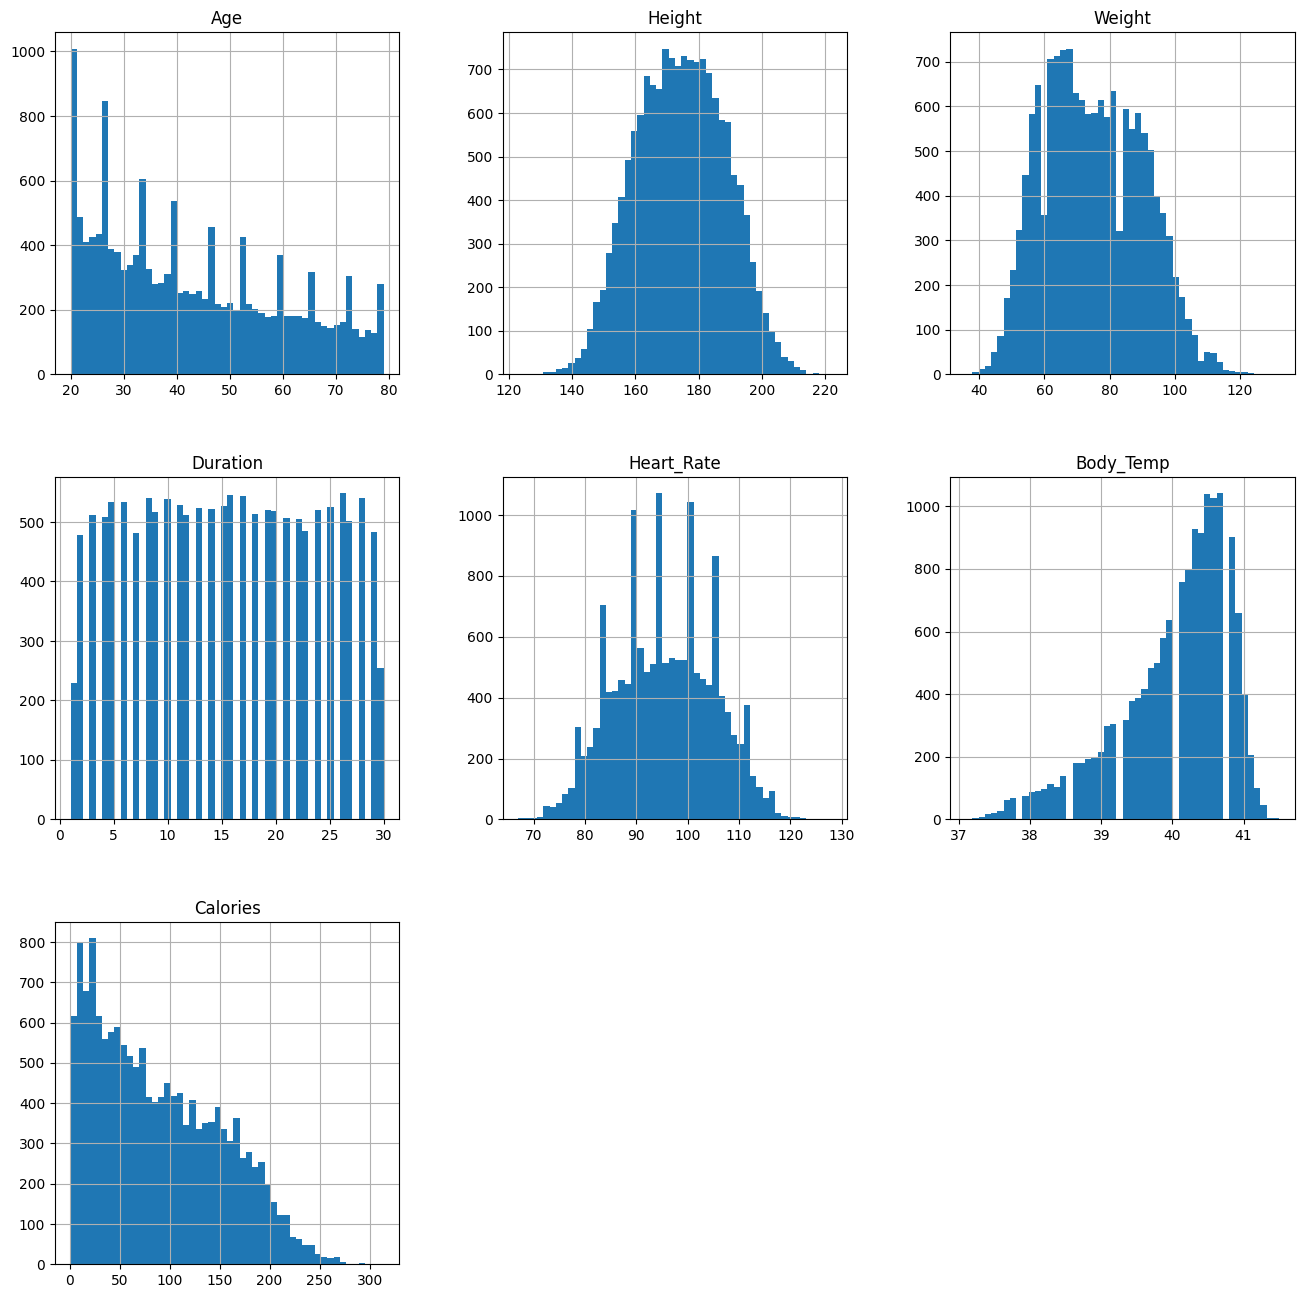

In [7]:
df.hist(bins=50,figsize=(16,16))
plt.show()

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

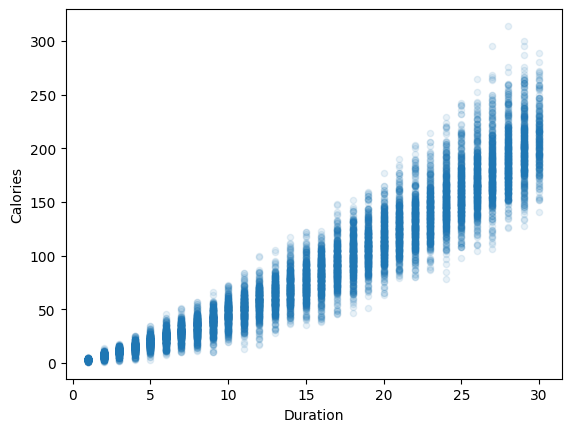

In [8]:
df.plot(kind='scatter',x ="Duration" , y = 'Calories' ,alpha=0.1)

In [9]:
cor_df = df.corr()
cor_df['Calories'].sort_values(ascending=False)

C:\Users\Puskchan\AppData\Local\Temp\ipykernel_2596\4101307732.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_df = df.corr()


Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Height        0.017537
Name: Calories, dtype: float64

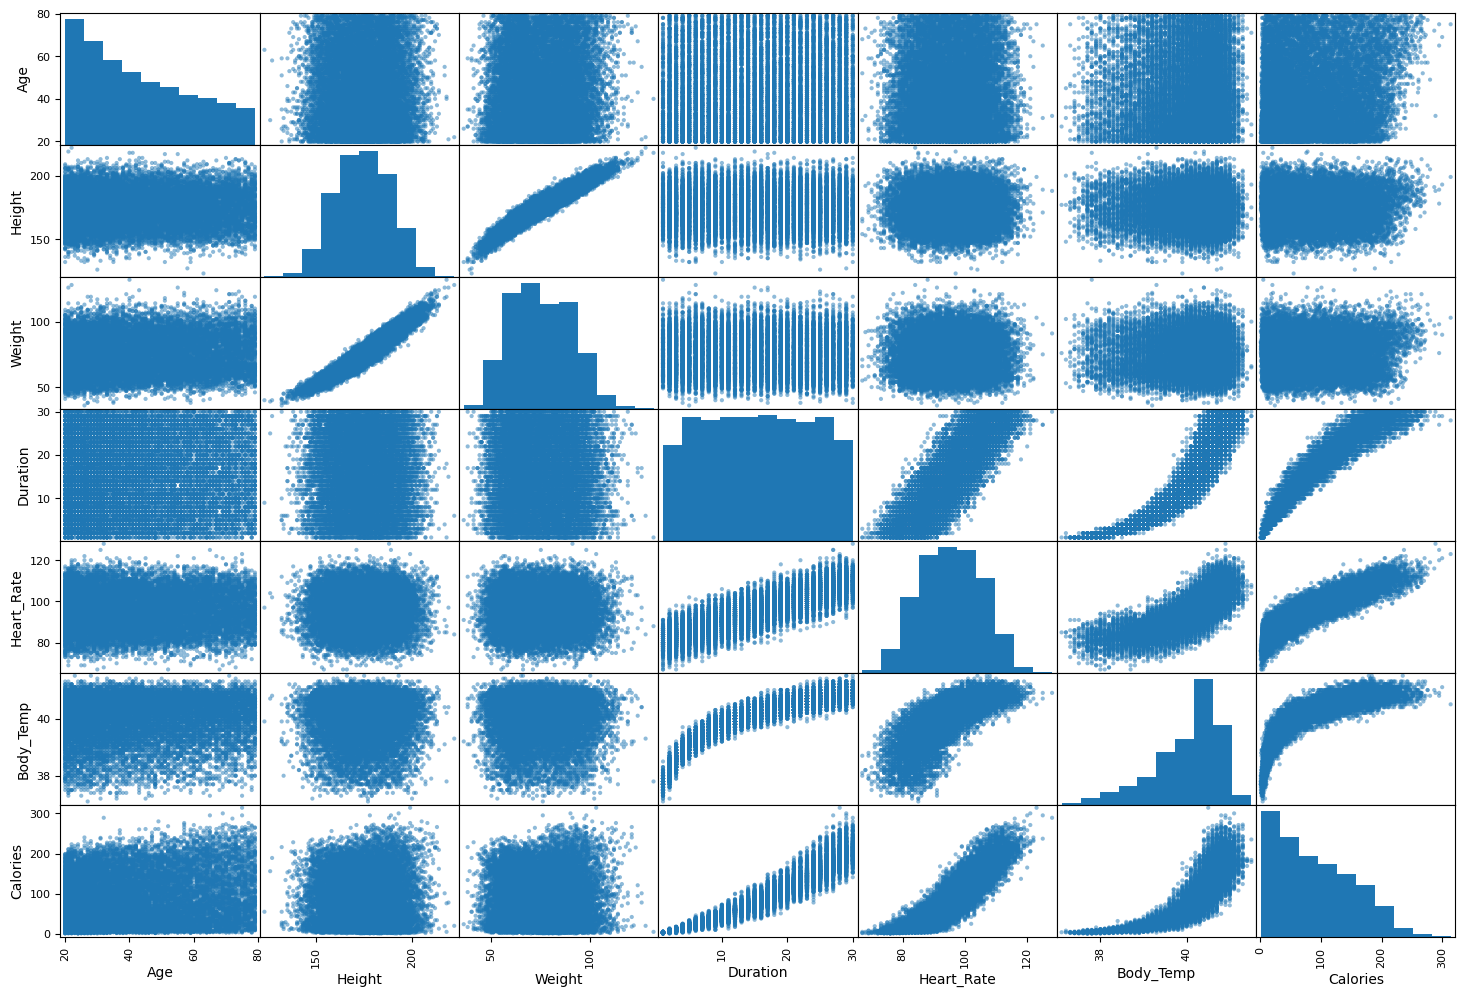

In [10]:
from pandas.plotting import scatter_matrix
att = ['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']
scatter_matrix(df[att],figsize=(18,12))
plt.show()

In [11]:
x = df.drop(columns=['Calories'])
y = df['Calories']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.fit_transform(X_test['Gender'])
X_test

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
10644,1,64,180,82,12,96,40.4
13951,1,39,194,93,18,89,40.3
8082,0,25,147,47,25,108,40.5
10284,0,72,146,49,22,103,40.5
13473,0,45,162,67,17,99,40.2
...,...,...,...,...,...,...,...
1040,0,53,164,65,13,98,40.3
669,0,28,172,68,3,85,38.6
2729,1,20,179,75,17,109,40.3
9858,1,26,174,77,9,88,39.6


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9979476890125933

In [15]:
rf.predict(np.array([[1,64,180,82,12,96,40.4]]))

C:\Users\Puskchan\AppData\Local\Programs\Python\Python38\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([73.51])

In [16]:
import pickle

In [17]:
pickle.dump(rf, open('rfmod.pkl','wb'))

In [18]:
pickled_model = pickle.load(open('rfmod.pkl','rb'))

In [19]:
pickled_model.predict(np.array([[1,64,180,82,12,96,40.4]]))

C:\Users\Puskchan\AppData\Local\Programs\Python\Python38\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([73.51])